# Import Packages and Read Data

*   load already standardized data
*   Use standardization to fature scale as there are anomalies



In [ ]:
import pandas as pd
import numpy as np

x_test_stand = np.load('/Data/X_test_stand.npy')
x_train_stand = np.load('/Data/X_train_stand.npy')
y_test = np.load('/Data/y_test.npy')
y_train = np.load('/Data/y_train.npy')

# Import Packages for KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Implementing KMeans on Train Dataset



In [ ]:
#there are 2 clusters M and B
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train_stand)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
cluster_ids = kmeans.fit_predict(x_train_stand)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualize Clusters

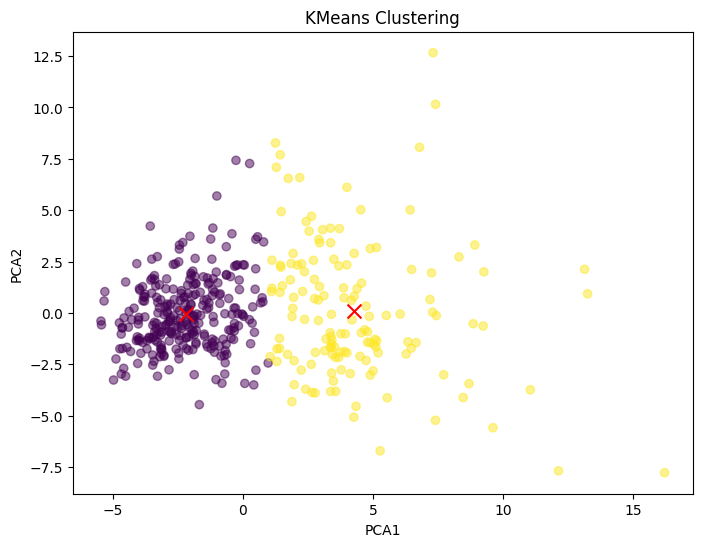

In [ ]:
#reduce the dimension of 10 features into 2 using PCA
pca = PCA(n_components=2)
x_train_stand_pca = pca.fit_transform(x_train_stand)
plt.figure(figsize=(8, 6))
plt.scatter(x_train_stand_pca[:, 0], x_train_stand_pca[:, 1], c=cluster_ids, cmap='viridis', alpha=0.5)
centroid_pca = pca.transform(centroids)
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Predict Clusters Using Test Dataset

In [ ]:
prediction = kmeans.predict(x_test_stand)

# Assigning Binary Variable to Cluster

*   We visualised which indices is clustered as Cluster 0 or Cluster 1
*   For each cluster, we assigned a binary variable based on the majority output found in y_test
*   Eg. The majority of instances in Cluster 0 were labeled as 1 in y_test, so we assigned 1 to Cluster 0. Similarly, we assigned 0 to Cluster 1





In [ ]:
#comparing Cluster ID with y_test
cluster_indices = [[] for i in range(2)]
for index, cluster_id in enumerate(prediction):
    cluster_indices[cluster_id].append(index)
for cluster_id, indices in enumerate(cluster_indices):
    print(indices)
    print(len(indices))
print(y_test)

#assigning binary variable to clusters
labels = np.zeros(len(prediction))
labels[cluster_indices[0]] = 1
labels[cluster_indices[1]] = 0

[0, 3, 4, 9, 10, 12, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 59, 60, 63, 64, 65, 68, 69, 72, 74, 75, 76, 77, 78, 79, 81, 82, 84, 88, 89, 90, 91, 92, 93, 94, 95, 98, 100, 101, 104, 105, 106, 108, 109, 111, 112, 116, 117, 118, 121, 122, 124, 127, 128, 132, 133, 134, 136, 137, 140, 142]
91
[1, 2, 5, 6, 7, 8, 11, 13, 15, 19, 22, 29, 38, 41, 50, 51, 57, 58, 61, 62, 66, 67, 70, 71, 73, 80, 83, 85, 86, 87, 96, 97, 99, 102, 103, 107, 110, 113, 114, 115, 119, 120, 123, 125, 126, 129, 130, 131, 135, 138, 139, 141]
52
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]


# Evaluating KMeans Algorithm

*   Confusion Matrix
*   Accuracy Score
*   Precision Score
*   Recall Score
*   F-1 Score







In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test,labels)
accuracy = accuracy_score(y_test,labels)
precision = precision_score(y_test,labels)
recall = recall_score(y_test,labels)
f1 = f1_score(y_test,labels)

print('Confusion Matrix:')
print(cm)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',f1)

Confusion Matrix:
[[49  5]
 [ 3 86]]
Accuracy: 0.9440559440559441
Precision: 0.945054945054945
Recall: 0.9662921348314607
F1 Score: 0.9555555555555557
